In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker  # For fine control over ticks
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from adjustText import adjust_text
from scipy import stats

from smbh_corona.plot_utils import nice_fonts       # Import the nice_fonts settings
matplotlib.rcParams.update(nice_fonts)
plt.rcParams['figure.dpi'] = 120        # Default is 100, this gives slightly more dpi

## Make a dictionary with the parameters of each source

In [2]:
Lsun = 3.839e33 # erg/s

# Define the sources and their properties (with short names, easier for plotting)
sources = {
    'GRS1734': {'r_c': 150, 'r_c_err': 40, 'log_delta': -1.74, 'log_delta_err': 0.13, 'B': 20, 'B_err': 4, 'sigma': 0.015, 'sigma_err': 0.002, 'con': False, 'nu_p':130, 'nu_p_err':14, 'S_p':0.91, 'S_p_err':0.11, 'L_c':4e39, 'L_X':8e43, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.004, 'L_IR':np.nan, 'logM':7.84, 'logM_err':0.15},
    'IC4329A': {'r_c': 260, 'r_c_err': 80, 'log_delta': -2.4, 'log_delta_err': 0.4, 'B': 9.3, 'B_err': 2, 'sigma': 0.06, 'sigma_err': 0.01, 'con': False, 'nu_p':89.5, 'nu_p_err':19.7, 'S_p':4.2, 'S_p_err':1.1, 'L_c':7e39, 'L_X':2e44, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.018, 'L_IR':np.nan, 'logM':7.83, 'logM_err':0.07},
    'MCG-6-30-15': {'r_c': 118, 'r_c_err': 7, 'log_delta': -1.97, 'log_delta_err': 0.07, 'B': 20.9, 'B_err': 2.0, 'sigma': 0.037, 'sigma_err': 0.004, 'con': False, 'nu_p':133, 'nu_p_err':7, 'S_p':0.68, 'S_p_err':0.05, 'L_c':7e38, 'L_X':8e42, 'L_AGN':6.32e43, 'L_AGN_err':(2.44e43, 6.32e43), 'lambda_edd':0.003, 'L_IR':10**43.8, 'logM':7.3, 'logM_err':0.2},
    'NGC985': {'r_c': 122, 'r_c_err': 23, 'log_delta': -2.03, 'log_delta_err': 0.2, 'B': 14.4, 'B_err': 1.6, 'sigma': 0.014, 'sigma_err': 0.002, 'con': False, 'nu_p':100, 'nu_p_err':15, 'S_p':1.4, 'S_p_err':0.2, 'L_c':3.7e40, 'L_X':3e44, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.011, 'L_IR':np.nan, 'logM':8.34, 'logM_err':0.3},
    'NGC1068': {'r_c': 67.5, 'r_c_err': 5.5, 'log_delta': -0.99, 'log_delta_err': 0.13, 'B': 155, 'B_err': 8.0, 'sigma': 1.1, 'sigma_err': 0.1, 'con': False, 'nu_p':566, 'nu_p_err':55, 'S_p':10.3, 'S_p_err':1.8, 'L_c':4.4e39, 'L_X':2.3e43, 'L_AGN':4.59e43, 'L_AGN_err':(2.83e43, 7.28e43), 'lambda_edd':0.011, 'L_IR':0.78e11*Lsun, 'logM':7.22, 'logM_err':0.004},
    'NGC3227': {'r_c': 78, 'r_c_err': 37, 'log_delta': -2.03, 'log_delta_err': 0.53, 'B': 46, 'B_err': 7, 'sigma': 0.088, 'sigma_err': 0.01, 'con': False, 'nu_p':233, 'nu_p_err':99, 'S_p':0.94, 'S_p_err':0.48, 'L_c':3.4e38, 'L_X':9e42, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.004, 'L_IR':np.nan, 'logM':7.2, 'logM_err':0.5},
}

# Extract data for plotting
names = list(sources.keys())
r_c_values = [sources[name]['r_c'] for name in names]
r_c_errors = [sources[name]['r_c_err'] for name in names]
log_delta_values = [sources[name]['log_delta'] for name in names]
log_delta_errors = [sources[name]['log_delta_err'] for name in names]
B_values = [sources[name]['B'] for name in names]
B_errors = [sources[name]['B_err'] for name in names]
sigma_values = [sources[name]['sigma'] for name in names]
sigma_errors = [sources[name]['sigma_err'] for name in names]
con_flags = [sources[name]['con'] for name in names]
nu_p_values = [sources[name]['nu_p'] for name in names]
nu_p_errors = [sources[name]['nu_p_err'] for name in names]
S_p_values = [sources[name]['S_p'] for name in names]
S_p_errors = [sources[name]['S_p_err'] for name in names]
logM_values = [sources[name]['logM'] for name in names]
logM_errors = [sources[name]['logM_err'] for name in names]

## Plots $r_c$ vs $\log{\delta}$

Mean r_c = 132.58
Mean log_delta = -1.86
Median B = 20.45
Median sigma = 0.05


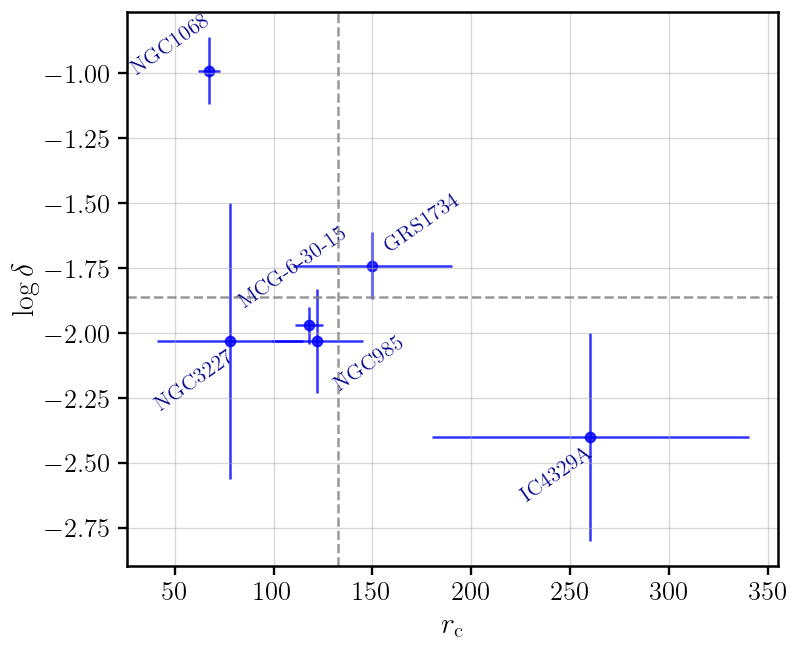

In [3]:
r_c_values_RQ = [sources[name]['r_c'] for name in names if not sources[name]['con']]
r_c_errors_RQ = [sources[name]['r_c_err'] for name in names if not sources[name]['con']]
log_delta_values_RQ = [sources[name]['log_delta'] for name in names if not sources[name]['con']]
log_delta_errors_RQ = [sources[name]['log_delta_err'] for name in names if not sources[name]['con']]
B_values_RQ = [sources[name]['B'] for name in names if not sources[name]['con']]
B_errors_RQ = [sources[name]['B_err'] for name in names if not sources[name]['con']]
sigma_values_RQ = [sources[name]['sigma'] for name in names if not sources[name]['con']]
sigma_errors_RQ = [sources[name]['sigma_err'] for name in names if not sources[name]['con']]

# Calculate average values
avg_r_c_RQ = np.mean(r_c_values_RQ)
avg_log_delta_RQ = np.mean(log_delta_values_RQ)
avg_B_RQ = np.median(B_values_RQ)
avg_sigma_RQ = np.median(sigma_values)
print(f"Mean r_c = {avg_r_c_RQ:.2f}")
print(f"Mean log_delta = {avg_log_delta_RQ:.2f}")
print(f"Median B = {avg_B_RQ:.2f}")
print(f"Median sigma = {avg_sigma_RQ:.2f}")

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6),dpi=120)

# Add labels and title
plt.xlabel(r'$r_\mathrm{c}$')
plt.ylabel(r'$\log \delta$')

# Plot dashed lines for average values
plt.axvline(avg_r_c_RQ, color='gray', linestyle='--', label=f'Avg $r_c$: {avg_r_c_RQ:.2f}', alpha=0.8)
plt.axhline(avg_log_delta_RQ, color='gray', linestyle='--', label=f'Avg $\\log \\delta$: {avg_log_delta_RQ:.2f}', alpha=0.8)

# Scatter plot with error bars
texts = []
for i, name in enumerate(names):
    if not con_flags[i]: 
        fmt = 'bo'
        text_color = 'darkblue'

        # Plot the error bar
        plt.errorbar(r_c_values[i], log_delta_values[i], xerr=r_c_errors[i], yerr=log_delta_errors[i], fmt=fmt, alpha=0.8, zorder=1)
    
        # Add the text label with the appropriate colour
        text = plt.text(r_c_values[i], log_delta_values[i], name, fontsize=13, ha='center', va='center', rotation=35, color=text_color, zorder=5)
        texts.append(text)


adjust_text(
    texts,
    expand_points=(1.2, 1.2),    # Lower values keep labels closer to points
    expand_text=(1.2, 1.2),      # Adjust text expansion to be closer
    force_text=(0.5, 0.5),       # Strength to keep labels from overlapping each other
)

plt.grid(True, alpha=0.5)

plt.savefig(f"plot_r_vs_delta_non-CONs.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

## Plot $M_\mathrm{BH}$ vs $\nu_\mathrm{p}$

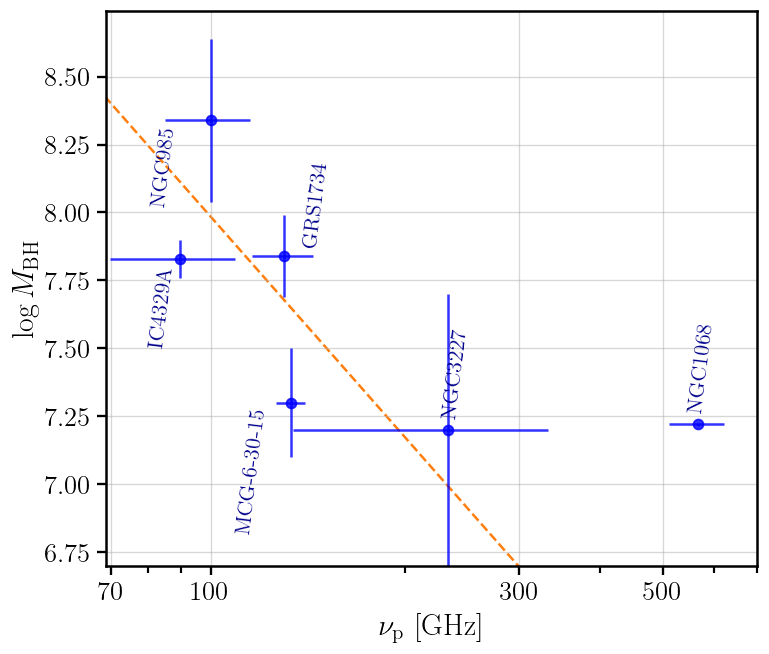

In [4]:
# Create the plot
fig, ax = plt.subplots(figsize=(7, 6),dpi=120)

# Add labels and title
plt.xlabel(r'$\nu_\mathrm{p}$~[GHz]')
plt.ylabel(r'$\log{M_\mathrm{BH}}$')

xmin, xmax = 69, 700 
ymin, ymax = 6.7, 8.74 
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Plot the linear relation: log_nu = -0.37 * log_M + constant # from the fit
logMs = np.linspace(6.5, 8.75, 4) 
nus = 10**(-0.37 * logMs) * 0.9e5 #1.24e5
plt.plot(nus, logMs, color="C1", linestyle="--", zorder=1) 

# Scatter plot with error bars
texts = []
for i, name in enumerate(names):
    if not con_flags[i]: 
        fmt = 'bo'
        text_color = 'darkblue'
        
        # Plot the error bar
        plt.errorbar(nu_p_values[i], logM_values[i], xerr=nu_p_errors[i], yerr=logM_errors[i], fmt=fmt, alpha=0.8, zorder=2)
    
        # Add the text label with the appropriate colour
        text = plt.text(nu_p_values[i], logM_values[i], name, fontsize=13, ha='center', va='center', rotation=83, color=text_color, zorder=4)
        texts.append(text)


adjust_text(
    texts,
    expand_points=(1.2, 1.2),    # Lower values keep labels closer to points
    expand_text=(1.2, 1.2),      # Adjust text expansion to be closer
    force_text=(0.8, 0.8),       # Strength to keep labels from overlapping each other
)

plt.xscale("log")
plt.grid(True, alpha=0.5)

# Define custom tick locations and labels
xticks = [70, 100, 300, 500]
plt.xticks(xticks, labels=[str(x) for x in xticks])

plt.savefig(f"plot_nup_vs_MBH_non-CONs.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

Weighted mean B = 17.98
Weighted mean log_delta = -1.78
Median B = 20.45
Median log_delta = -2.00


NameError: name 'avg_r_c' is not defined

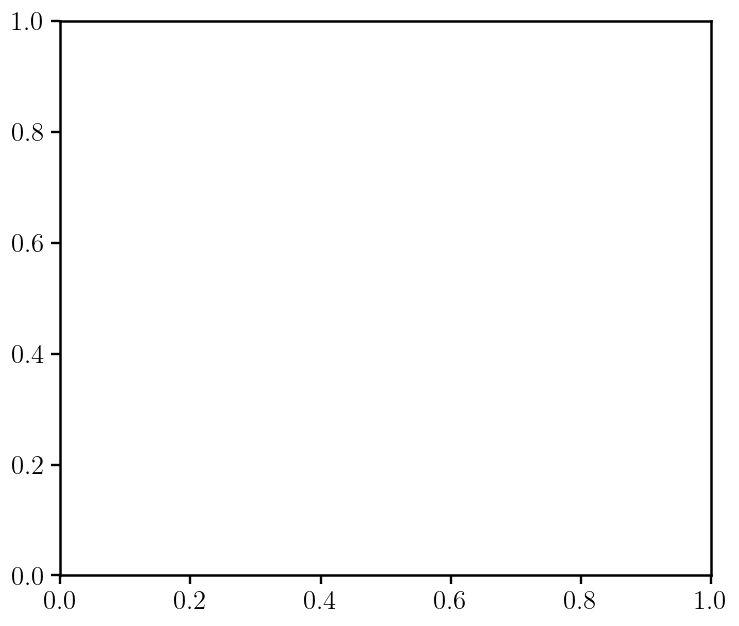

In [5]:
# Calculate average values

avg_B = np.average(B_values, weights=1/np.square(B_errors))
avg_log_delta = np.average(log_delta_values, weights=1/np.square(log_delta_errors))
print(f"Weighted mean B = {avg_B:.2f}")
print(f"Weighted mean log_delta = {avg_log_delta:.2f}")

avg_B = np.median(B_values)
avg_log_delta = np.median(log_delta_values)
print(f"Median B = {avg_B:.2f}")
print(f"Median log_delta = {avg_log_delta:.2f}")

# Calculate median values weighted with the errors
#avg_B = weighted_median(B_values, B_errors)
#avg_log_delta = weighted_median(log_delta_values, log_delta_errors)
#print(f"Weighted median B = {avg_B:.2f}")
#print(f"Weighted median log_delta = {avg_log_delta:.2f}")

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Plot dashed lines for average values
plt.axvline(avg_B, color='gray', linestyle='--', label=f'Avg $r_c$: {avg_r_c:.2f}', alpha=0.8)
plt.axhline(avg_log_delta, color='gray', linestyle='--', label=f'Avg $\\log \\delta$: {avg_log_delta:.2f}', alpha=0.8)

# Scatter plot with error bars
for i, name in enumerate(names):
    if con_flags[i]: 
        fmt = 'rs'
        text_color = 'darkred'
    else: 
        fmt = 'bo'
        text_color = 'darkblue'
        
    plt.errorbar(B_values[i], log_delta_values[i], xerr=B_errors[i], yerr=log_delta_errors[i], fmt=fmt)
    plt.text(B_values[i], log_delta_values[i], name, fontsize=11.5, ha='center', va='bottom', rotation=0, color=text_color)


# Add labels and title
plt.xlabel(r'$B$ (G)')
plt.ylabel(r'$\log \delta$')

# Add legend
#plt.legend()

plt.xscale('log')

plt.grid(True)

plt.savefig(f"plot_B_vs_delta.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

In [ ]:
# Calculate average values
avg_r_c = np.median(r_c_values)
avg_sigma = np.median(sigma_values)
print(avg_r_c)
print(avg_sigma)

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Plot dashed lines for average values
plt.axvline(avg_r_c, color='gray', linestyle='--', label=f'Avg $r_c$: {avg_r_c:.2f}', alpha=0.8)
plt.axhline(avg_sigma, color='gray', linestyle='--', label=f'Avg $\\log \\delta$: {avg_sigma:.2f}', alpha=0.8)

vertical_offset = 0.1  # Adjust this value as needed

# Scatter plot with error bars
for i, name in enumerate(names):
    if con_flags[i]: 
        fmt = 'rs'
        text_color = 'darkred'
    else: 
        fmt = 'bo'
        text_color = 'darkblue'

    plt.errorbar(r_c_values[i], sigma_values[i], xerr=r_c_errors[i], yerr=sigma_errors[i], fmt=fmt)
    plt.text(r_c_values[i], sigma_values[i]*(1-vertical_offset), name, fontsize=11.5, ha='center', va='top', rotation=0, color=text_color)


# Add labels and title
plt.xlabel(r'$r_\mathrm{c}$')
plt.ylabel(r'$\sigma$')
#plt.title('Scatter Plot of $\\log \\delta$ vs $r_c$')

# Add legend
#plt.legend()

plt.loglog()

plt.grid(True)

plt.savefig(f"plot_rc_vs_sigma.pdf", bbox_inches='tight', pad_inches = 0.01)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 6))

# Separate B_values based on 'con' flag and take the log10 if logscale is True
logscale = 1

B_values_con = [sources[name]['B'] for name in sources if sources[name]['con']]
B_values_noncon = [sources[name]['B'] for name in sources if not sources[name]['con']]

if logscale:
    B_values_con = np.log10(B_values_con)
    B_values_noncon = np.log10(B_values_noncon)
    xlabel = r'$\log{( B~\mathrm{[G]} )}$'
else:
    xlabel = r'$B$~[G]'

# Combine the two datasets to determine the common bin edges
all_B_values = np.concatenate([B_values_con, B_values_noncon])
bins = np.histogram_bin_edges(all_B_values, bins='auto')

# Plot the stacked histogram with the same bins
plt.hist([B_values_con, B_values_noncon], bins=6, edgecolor='black', alpha=0.6, label=['CONs', 'non-CONs'], stacked=True, color=['red', 'blue'])

# Add labels, title, and legend
plt.xlabel(xlabel)
plt.ylabel('Counts')
plt.title('')
plt.legend()

# Set y-ticks at integer values
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the plot
plt.savefig(f"histogram_logB.pdf", bbox_inches='tight', pad_inches = 0.01)
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(7.5, 6))

# Separate B_values based on 'con' flag and take the log10 if logscale is True
logscale = 0

B_values_con = [sources[name]['B'] for name in sources if sources[name]['con']]
B_values_noncon = [sources[name]['B'] for name in sources if not sources[name]['con']]

if logscale:
    B_values_con = np.log10(B_values_con)
    B_values_noncon = np.log10(B_values_noncon)
    xlabel = r'$\log{( B~\mathrm{[G]} )}$'
else:
    xlabel = r'$B$~[G]'

# Combine the two datasets to determine the common bin edges
all_B_values = np.concatenate([B_values_con, B_values_noncon])
bins = np.histogram_bin_edges(all_B_values, bins='auto')

# Plot the stacked histogram with the same bins
plt.hist([B_values_con, B_values_noncon], bins=6, edgecolor='black', alpha=0.6, label=['CONs', 'non-CONs'], stacked=True, color=['red', 'blue'])

# Add labels, title, and legend
plt.xlabel(xlabel)
plt.ylabel('Counts')
plt.title('')
plt.legend()

# Show the plot
plt.savefig(f"histogram_B.pdf", bbox_inches='tight', pad_inches = 0.01)
plt.show()

In [ ]:
# Separate B_values based on 'con' flag and take the log10 if logscale is True
logscale = 1

sigma_values_con = [sources[name]['sigma'] for name in sources if sources[name]['con']]
sigma_values_noncon = [sources[name]['sigma'] for name in sources if not sources[name]['con']]

if logscale:
    sigma_values_con = np.log10(sigma_values_con)
    sigma_values_noncon = np.log10(sigma_values_noncon)
    xlabel = r'$\log{\sigma}$'
else:
    xlabel = r'$\sigma$'

# Combine the two datasets to determine the common bin edges
all_sigma_values = np.concatenate([sigma_values_con, B_values_noncon])
bins = np.histogram_bin_edges(all_sigma_values, bins='auto')

# Plot the stacked histogram with the same bins
plt.hist([sigma_values_con, sigma_values_noncon], bins=bins, edgecolor='black', alpha=0.6, label=['CONs', 'non-CONs'], stacked=True, color=['red', 'blue'])

# Add labels, title, and legend
plt.xlabel(xlabel)
plt.ylabel('Counts')
plt.title('')
plt.legend()

# Show the plot
plt.savefig(f"histogram_sigma.pdf", bbox_inches='tight', pad_inches = 0.01)
plt.show()

In [ ]:
# Separate nu_p_values based on 'con' flag and take the log10 if logscale is True
logscale = 0

# Original lists, filtering out NaN values
nu_p_con = [sources[name]['nu_p'] for name in sources if sources[name]['con'] and not np.isnan(sources[name]['nu_p'])]
nu_p_noncon = [sources[name]['nu_p'] for name in sources if not sources[name]['con'] and not np.isnan(sources[name]['nu_p'])]

if logscale:
    B_values_con = np.log10(B_values_con)
    B_values_noncon = np.log10(B_values_noncon)
    xlabel = r'$\log{( B~\mathrm{[G]} )}$'
else:
    xlabel = r'$\nu$~[GHz]'

# Combine the two datasets to determine the common bin edges
all_nu_p_values = np.concatenate([nu_p_con, nu_p_noncon])
bins = np.histogram_bin_edges(all_nu_p_values, bins='auto')

# Plot the stacked histogram with the same bins
plt.hist([nu_p_con, nu_p_noncon], bins=bins, edgecolor='black', alpha=0.6, label=['CONs', 'non-CONs'], stacked=True, color=['red', 'blue'])

# Add labels, title, and legend
plt.xlabel(xlabel)
plt.ylabel('Counts')
plt.title('')
plt.legend()

# Show the plot
plt.savefig(f"histogram_nup.pdf", bbox_inches='tight', pad_inches = 0.01)
plt.show()

In [ ]:
# Separate nu_p_values based on 'con' flag and take the log10 if logscale is True
logscale = 1

# Original lists, filtering out NaN values
L_c_con = [sources[name]['L_c'] for name in sources if sources[name]['con'] and not np.isnan(sources[name]['L_c'])]
L_c_noncon = [sources[name]['L_c'] for name in sources if not sources[name]['con'] and not np.isnan(sources[name]['L_c'])]

if logscale:
    L_c_con = np.log10(L_c_con)
    L_c_noncon = np.log10(L_c_noncon)
    xlabel = r'$\log{( L_\mathrm{c}~\mathrm{[erg~s^{-1}]} )}$'
else:
    xlabel = r'$\nu$~[GHz]'

# Combine the two datasets to determine the common bin edges
all_L_c_values = np.concatenate([L_c_con, L_c_noncon])
bins = np.histogram_bin_edges(all_L_c_values, bins='auto')

# Plot the stacked histogram with the same bins
plt.hist([L_c_con, L_c_noncon], bins=bins, edgecolor='black', alpha=0.6, label=['CONs', 'non-CONs'], stacked=True, color=['red', 'blue'])

# Add labels, title, and legend
plt.xlabel(xlabel)
plt.ylabel('Counts')
plt.title('')
plt.legend()

# Show the plot
plt.savefig(f"histogram_Lc.pdf", bbox_inches='tight', pad_inches = 0.01)
plt.show()

In [ ]:
# THE ERRORBARS ARE NOT REAL

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Filter out names where either L_c or L_X has NaNs, keeping lists in sync
filtered_data = [(sources[name]['L_c'], sources[name]['L_X'], name, con_flags[i]) 
                 for i, name in enumerate(names) 
                 if not (np.isnan(sources[name]['L_c']) or np.isnan(sources[name]['L_X']))]

# Unpack the filtered data
L_c_values, L_X_values, filtered_names, filtered_con_flags = zip(*filtered_data)


# Scatter plot with error bars
for i, name in enumerate(filtered_names):
    fmt = 'rs' if filtered_con_flags[i] else 'bo'  # Define point type based on con_flags
    plt.errorbar(L_c_values[i], L_X_values[i], xerr=0.3 * L_c_values[i], yerr=0.3 * L_X_values[i], fmt=fmt)    
    plt.text(L_c_values[i], L_X_values[i], name, fontsize=12, ha='center', va='bottom', rotation=10)


# Add labels 
plt.xlabel(r'$L_\mathrm{c}$ (erg/s)')
plt.ylabel(r'$L_\mathrm{X}$ (erg/s)')

plt.xscale('log')
plt.yscale('log')

plt.grid(True)

plt.savefig(f"plot_Lc_vs_LX.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

In [ ]:
# THE ERRORBARS ARE NOT REAL

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

with_APM = 1
if with_APM:
    xmin, xmax = 1e43, 1e48
    ymin, ymax = 1e42, 4e47 
    #xmin, xmax = 1e43, 2e46
    #ymin, ymax = 1e42, 2e46 
    angle = 45
else:
    #xmin, xmax = 1e44, 1.8e45
    #ymin, ymax = 1e44, 1.8e45  
    xmin, xmax = 1e43, 2e45
    ymin, ymax = 1e42, 2e45    
    angle = 35
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

#-----------------------------------------------------------------------------

# Define the number of lines and create a colormap
num_lines = 3
colormap = cm.get_cmap('viridis')

# Restrict the range to avoid yellow (e.g., using 0.0 to 0.75)
min_val, max_val = 0.0, 0.6  # Adjust max_val to control yellow exclusion

# Generate colors within the restricted range
fractions = [1.0, 0.33, 0.1]
linestyles = ['-.', '--', ':']
colors = [colormap(min_val + (max_val - min_val) * (i / (num_lines - 1))) for i in range(num_lines)]


# Plot the lines with gradient colors
for i in range(num_lines):
    # Plot the line
    ax.plot([xmin, xmax], [fractions[i] * xmin, fractions[i] * xmax], 
            color=colors[i], linestyle=linestyles[i], linewidth=2.5, alpha=0.7, zorder=0)

# Add label with same inclination as the line
mid_x = np.sqrt(xmin * xmax)  # Midpoint for label on log scale
mid_y = np.sqrt(ymin * ymax)
#ax.text(mid_x, mid_y*15, r"$L_\mathrm{IR} = L_\mathrm{X}$", color='C0', fontsize=14, ha='left', va='bottom',
ax.text(xmin*4, ymin*4.2 * 10, r"$L_\mathrm{IR} = L_\mathrm{X}$", color=colors[0], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9)

#ax.text(xmin*4, ymin*4.2 * 5, r"$L_\mathrm{IR} = 2 L_\mathrm{X} $", color=colors[1], fontsize=15, ha='left', va='bottom',
#        rotation=angle, rotation_mode='anchor', alpha=0.7)
ax.text(xmin*4, ymin*4.8 * 3, r"$L_\mathrm{IR} = 3 L_\mathrm{X} $", color=colors[1], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9)

ax.text(xmin*4, ymin*4.2, r"$L_\mathrm{IR} = 10 L_\mathrm{X} $", color=colors[2], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9, zorder=0)

#-----------------------------------------------------------------------------


# Filter out names where either L_c or L_AGN has NaNs, keeping lists in sync
filtered_data = [(sources[name]['L_IR'], sources[name]['L_AGN'], name, con_flags[i]) 
                 for i, name in enumerate(names) 
                 if not (np.isnan(sources[name]['L_IR']) or np.isnan(sources[name]['L_AGN']))]

# Unpack the filtered data
L_IR_values, L_AGN_values, filtered_names, filtered_con_flags = zip(*filtered_data)

# Scatter plot with error bars
texts = []
for i, name in enumerate(filtered_names):
    if filtered_con_flags[i]: 
        fmt = 'rs'
        text_color = 'darkred'
    else: 
        fmt = 'bo'
        text_color = 'darkblue'
        
    plt.errorbar(L_IR_values[i], L_AGN_values[i], xerr=0.1 * L_IR_values[i], yerr=0.5 * L_AGN_values[i], fmt=fmt, alpha=0.8)
    
    # Append each label as a text object
    text = plt.text(L_IR_values[i], L_AGN_values[i], name, fontsize=11, ha='center', va='bottom', rotation=50, color=text_color, zorder=2)
    texts.append(text)

# Adjust the text positions to avoid overlap and keep them close to the points
#adjust_text(
#    texts,
#    expand_points=(0.2, 0.2),    # Keep labels close to points
#    expand_text=(0.2, 0.2),      # Adjust text expansion to be closer
#    force_text=(0.5, 0.5)        # Prevent overlap between labels
#)

# Add line of x = y across plot limits
#xmin, xmax = ax.get_xlim()
#ymin, ymax = ax.get_ylim()


# Add labels and title
plt.xlabel(r'$L_\mathrm{IR}$ (erg/s)')
plt.ylabel(r'$L_\mathrm{X}$ (erg/s)')

# Add legend
#plt.legend()

plt.xscale('log')
plt.yscale('log')


plt.grid(True)

plt.savefig(f"plot_LIR_vs_LX.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

### Plot L_IR vs L_AGN

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

with_APM = 1
if with_APM:
    xmin, xmax = 1e43, 1e48
    ymin, ymax = 1e42, 8e47 
    #xmin, xmax = 1e43, 2e46
    #ymin, ymax = 1e42, 2e46 
    angle = 45
else:
    #xmin, xmax = 1e44, 1.8e45
    #ymin, ymax = 1e44, 1.8e45  
    xmin, xmax = 1e43, 2e46
    ymin, ymax = 1e42, 2e46    
    angle = 40
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

#-----------------------------------------------------------------------------

# Define the number of lines and create a colormap
num_lines = 3
colormap = cm.get_cmap('viridis')

# Restrict the range to avoid yellow (e.g., using 0.0 to 0.75)
min_val, max_val = 0.0, 0.6  # Adjust max_val to control yellow exclusion

# Generate colors within the restricted range
fractions = [1.0, 0.33, 0.1]
linestyles = ['-.', '--', ':']
colors = [colormap(min_val + (max_val - min_val) * (i / (num_lines - 1))) for i in range(num_lines)]


# Plot the lines with gradient colors
for i in range(num_lines):
    # Plot the line
    ax.plot([xmin, xmax], [fractions[i] * xmin, fractions[i] * xmax], 
            color=colors[i], linestyle=linestyles[i], linewidth=2.5, alpha=0.7, zorder=0)

# Add label with same inclination as the line
mid_x = np.sqrt(xmin * xmax)  # Midpoint for label on log scale
mid_y = np.sqrt(ymin * ymax)
#ax.text(mid_x, mid_y*15, r"$L_\mathrm{IR} = L_\mathrm{X}$", color='C0', fontsize=14, ha='left', va='bottom',
ax.text(xmin*4, ymin*4.2 * 10, r"$L_\mathrm{IR} = L_\mathrm{AGN}$", color=colors[0], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9)

#ax.text(xmin*4, ymin*4.2 * 5, r"$L_\mathrm{IR} = 2 L_\mathrm{X} $", color=colors[1], fontsize=15, ha='left', va='bottom',
#        rotation=angle, rotation_mode='anchor', alpha=0.7)
ax.text(xmin*4, ymin*4.8 * 3, r"$L_\mathrm{IR} = 3 L_\mathrm{AGN}$", color=colors[1], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9)

ax.text(xmin*4, ymin*4.2, r"$L_\mathrm{IR} = 10 L_\mathrm{AGN}$", color=colors[2], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9, zorder=0)

#-----------------------------------------------------------------------------


# Filter out names where either L_c or L_AGN has NaNs, keeping lists in sync
filtered_data = [(sources[name]['L_IR'], sources[name]['L_AGN'], sources[name]['L_AGN_err'], name, con_flags[i]) 
                 for i, name in enumerate(names) 
                 if not (np.isnan(sources[name]['L_IR']) or np.isnan(sources[name]['L_AGN']))]

# Unpack the filtered data
L_IR_values, L_AGN_values, L_AGN_errors, filtered_names, filtered_con_flags = zip(*filtered_data)

# Scatter plot with error bars
texts = []
for i, name in enumerate(filtered_names):
    if filtered_con_flags[i]: 
        fmt = 'rs'
        text_color = 'darkred'
    else: 
        fmt = 'bo'
        text_color = 'darkblue'

    plt.errorbar(x=L_IR_values[i], y=L_AGN_values[i], xerr=0.1 * L_IR_values[i], yerr=np.array([[L_AGN_errors[i][0]], [L_AGN_errors[i][1]]]), fmt=fmt, alpha=0.8)    
    
    # Append each label as a text object
    text = plt.text(L_IR_values[i], L_AGN_values[i], name, fontsize=11, ha='center', va='bottom', rotation=50, color=text_color, zorder=2)
    texts.append(text)

# Adjust the text positions to avoid overlap and keep them close to the points
#adjust_text(
#    texts,
#    expand_points=(0.2, 0.2),    # Keep labels close to points
#    expand_text=(0.2, 0.2),      # Adjust text expansion to be closer
#    force_text=(0.5, 0.5)        # Prevent overlap between labels
#)

# Add line of x = y across plot limits
#xmin, xmax = ax.get_xlim()
#ymin, ymax = ax.get_ylim()


# Add labels and title
plt.xlabel(r'$L_\mathrm{IR}$ (erg/s)')
plt.ylabel(r'$L_\mathrm{AGN}$ (erg/s)')

# Add legend
#plt.legend()

plt.xscale('log')
plt.yscale('log')


plt.grid(True)

plt.savefig(f"plot_LIR_vs_LAGN.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

In [ ]:
### Repeat the plot but using L_IR/L_AGN vs N_H or something like that? 

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

with_APM = 1
if with_APM:
    xmin, xmax = 1e43, 1e48
    ymin, ymax = 1e42, 8e47 
    angle = 45
else:
    xmin, xmax = 1e43, 2e46
    ymin, ymax = 1e42, 2e46    
    angle = 40
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

#-----------------------------------------------------------------------------

# Define the number of lines and create a colormap
num_lines = 3
colormap = cm.get_cmap('viridis')

# Restrict the range to avoid yellow (e.g., using 0.0 to 0.75)
min_val, max_val = 0.0, 0.6  # Adjust max_val to control yellow exclusion

# Generate colors within the restricted range
fractions = [1.0, 0.33, 0.1]
linestyles = ['-.', '--', ':']
colors = [colormap(min_val + (max_val - min_val) * (i / (num_lines - 1))) for i in range(num_lines)]


# Plot the lines with gradient colors
for i in range(num_lines):
    ax.plot([xmin, xmax], [fractions[i] * xmin, fractions[i] * xmax], 
            color=colors[i], linestyle=linestyles[i], linewidth=2.5, alpha=0.7, zorder=0)

# Add label with same inclination as the line
mid_x = np.sqrt(xmin * xmax)  # Midpoint for label on log scale
mid_y = np.sqrt(ymin * ymax)
ax.text(xmin*4, ymin*4.2 * 10, r"$L_\mathrm{IR} = L_\mathrm{AGN}$", color=colors[0], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9)

ax.text(xmin*4, ymin*4.8 * 3, r"$L_\mathrm{IR} = 3 L_\mathrm{AGN}$", color=colors[1], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9)

ax.text(xmin*4, ymin*4.2, r"$L_\mathrm{IR} = 10 L_\mathrm{AGN}$", color=colors[2], fontsize=14, ha='left', va='bottom',
        rotation=angle, rotation_mode='anchor', alpha=0.9, zorder=0)

#-----------------------------------------------------------------------------


# Filter out names where either L_c or L_AGN has NaNs, keeping lists in sync
filtered_data = [(sources[name]['L_IR'], sources[name]['L_AGN'], sources[name]['L_AGN_err'], name, con_flags[i]) 
                 for i, name in enumerate(names) 
                 if not (np.isnan(sources[name]['L_IR']) or np.isnan(sources[name]['L_AGN']))]

# Unpack the filtered data
L_IR_values, L_AGN_values, L_AGN_errors, filtered_names, filtered_con_flags = zip(*filtered_data)

# Scatter plot with error bars
texts = []
for i, name in enumerate(filtered_names):
    if filtered_con_flags[i]: 
        fmt = 'rs'
        text_color = 'darkred'
    else: 
        fmt = 'bo'
        text_color = 'darkblue'

    plt.errorbar(x=L_IR_values[i], y=L_AGN_values[i], xerr=0.1 * L_IR_values[i], yerr=np.array([[L_AGN_errors[i][0]], [L_AGN_errors[i][1]]]), fmt=fmt, alpha=0.8)    
    
    # Append each label as a text object
    text = plt.text(L_IR_values[i], L_AGN_values[i], name, fontsize=11, ha='center', va='bottom', rotation=50, color=text_color, zorder=2)
    texts.append(text)

# Add labels and title
plt.xlabel(r'$L_\mathrm{IR}$ (erg/s)')
plt.ylabel(r'$L_\mathrm{AGN}$ (erg/s)')

plt.xscale('log')
plt.yscale('log')

plt.grid(True)

plt.savefig(f"plot_LIR_vs_LAGN.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# Filter out entries with NaNs in required fields
filtered_data = [(sources[name]['lambda_edd'], sources[name]['L_IR'], sources[name]['L_AGN'], sources[name]['L_AGN_err'], name, con_flags[i]) 
                 for i, name in enumerate(names)
                 if not (np.isnan(sources[name]['lambda_edd']) or 
                         np.isnan(sources[name]['L_IR']) or 
                         np.isnan(sources[name]['L_AGN']))]

# Unpack filtered data
lambda_edd, L_IR_vals, L_AGN_vals, L_AGN_errs, filtered_names, filtered_con_flags = zip(*filtered_data)

# Compute y = L_IR / L_AGN and associated asymmetric error bars
ratios = []
ratio_err_low = []
ratio_err_high = []

for L_IR, L_AGN, L_AGN_err in zip(L_IR_vals, L_AGN_vals, L_AGN_errs):
    ratio = L_IR / L_AGN
    err_low = L_IR / (L_AGN + L_AGN_err[1]) - ratio  # Lower L_AGN → higher ratio → "low" err
    err_high = ratio - L_IR / (L_AGN - L_AGN_err[0])  # Higher L_AGN → lower ratio → "high" err
    ratios.append(ratio)
    ratio_err_low.append(abs(err_low))
    ratio_err_high.append(abs(err_high))

# Plotting
texts = []
for i, name in enumerate(filtered_names):
    if filtered_con_flags[i]:
        fmt = 'rs'
        text_color = 'darkred'
    else:
        fmt = 'bo'
        text_color = 'darkblue'

    ax.errorbar(x=lambda_edd[i], y=ratios[i], 
                yerr=np.array([[ratio_err_low[i]], [ratio_err_high[i]]]), 
                fmt=fmt, alpha=0.8)

    text = ax.text(lambda_edd[i], ratios[i], name, fontsize=11, ha='center', va='bottom', 
                   rotation=50, color=text_color, zorder=2)
    texts.append(text)

# Add a line at y=1
ax.axhline(y=1, color='gray', linestyle='--', linewidth=1.5, alpha=0.9, zorder=0)

# Labels, scales, and limits
ax.set_xlabel(r'$\lambda_{\rm Edd}$', fontsize=14)
ax.set_ylabel(r'$L_{\rm IR} / L_{\rm AGN}$', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)

# Optional: adjust limits based on your data
ax.set_xlim(1e-3, 0.3)  
ax.set_ylim(0.03, 99)

plt.tight_layout()
plt.savefig("plot_lambda_vs_ratioLIR-LAGN.pdf", bbox_inches='tight', pad_inches=0.01)
plt.show()
